In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
co_offending_table = pd.read_csv('./Cooffending.csv')

# Remove duplicate rows
co_offending_table.drop_duplicates(inplace=True)

# Format the date column as a python datetime object
co_offending_table['Date'] = co_offending_table.Date.apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%Y'))

# Add a column for the number of arrests of each offender
co_offending_table['ArrestCount'] = co_offending_table.groupby('NoUnique')['NoUnique'].transform('count')

# Sort it 
co_offending_table = co_offending_table.sort_values(by=['Date'])

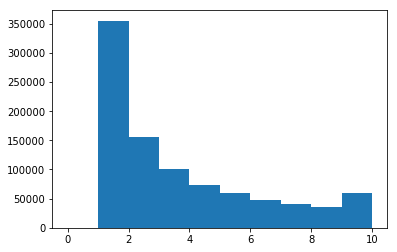

In [3]:
plt.hist(co_offending_table.ArrestCount, range=(0,10), bins=10)
plt.show()

In [4]:
def time_to_second_arrest(x):
    if len(x) == 1:
        return None
    else:
        if x.iloc[1]['Date']< x.iloc[0]['Date']:
            print(x)
        return x.iloc[1]['Date']-x.iloc[0]['Date']

In [5]:
time_until_second_arrest = co_offending_table.groupby('NoUnique').apply(time_to_second_arrest)

In [6]:
times = [time.days for time in time_until_second_arrest]

In [9]:
res = [x/365 for x in times if str(x) != 'nan']

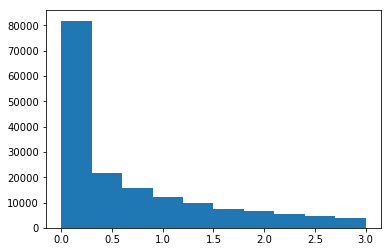

In [12]:
plt.hist(res, range=(0, 3))
plt.show()